<div style='background-image: url("../../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computational Seismology</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Finite Differences - Advection Diffusion Reaction Equation</div>
        </div>
    </div>
</div>

<p style="width:20%;float:right;padding-left:50px">
<img src=../../share/images/book.jpg>
<span style="font-size:smaller">
</span>
</p>


---

This notebook is part of the supplementary material 
to [Computational Seismology: A Practical Introduction](https://global.oup.com/academic/product/computational-seismology-9780198717416?cc=de&lang=en&#), 
Oxford University Press, 2016.


##### Authors:
* Ashim Rijal ([@ashimrijal](https://github.com/ashimrijal))
* Heiner Igel ([@heinerigel](https://github.com/heinerigel))

This exercise covers the following aspects:

* Solving the advection-diffusion-reaction equation with different schemes of finite difference method
* Investigation of different numerical solutions and finding the stable one
---

## Basic Equations

** Please refer to the Exercise 4.20 on Page 105 from the book.**

The advection-diffusion-reaction equation is given by

$$
\partial_t C(x,t) = k \partial_x^2 C(x,t) + v \partial_x C(x,t) - R(x)C(x,t) + P(x)
$$
Where,

$ C(x,t) $ is the concentration,

$ k $ is the diffusivity,

$ R(x) $ is the reactivity,

$ P(x) $ is the source, and

$ v $ is the advection velocity.

We replace the derivatives as follows


$$
\partial_x C(x,t) \ \approx \ \frac{C(x + \mathrm{d}x, t) - C(x -\mathrm{d}x,t)} {2 \mathrm{d}x}
$$

$$
\partial_x^2 C(x,t) \ \approx \ \frac{C(x + \mathrm{d}x, t) - 2C(x,t) + C(x - \mathrm{d}x, t)}{\mathrm{d}x^2}
$$

$$
\partial_t C(x,t) \ \approx \ \frac{C(x, t + \mathrm{d}t) - C(x,t)}{ \mathrm{d}t}
$$

The R.H.S. of the advection-diffusion-reaction becomes

$$
R.H.S. = dc = k \bigg[ \frac{C(x + \mathrm{d}x) -2 C(x) + C(x - \mathrm{d}x)}{\mathrm{d} x^2} \bigg] + v \bigg[ \frac{C(x + \mathrm{d}x) - C(x -\mathrm{d}x)}{2dx} \bigg] - RC + P
$$

Now, solving for $ C(x, t + \mathrm{d}t) $ the extrapolation scheme is

$$
C(x, t + \mathrm{d}t) = dc  \mathrm{d}t + C(t) = k \mathrm{d}t \bigg[ \frac{C(x + \mathrm{d}x) -2 C(x) + C(x - \mathrm{d}x)}{\mathrm{d} x^2} \bigg] + v \mathrm{d}t \bigg[ \frac{C(x + \mathrm{d}x) - C(x -\mathrm{d}x)}{2dx} \bigg] - RC \mathrm{d}t + P \mathrm{d}t + C(t)
$$

**Note that we used centered finite-difference (in velocity term) scheme.**

### Exercise
First understand the following codes, run the simulation and interpret the solution (plot). 

Then, implement the forward and the backward (in velocity term) finite-difference schemes. Investigate different numerical solutions. Which scheme is stable?

**Message: Once you become familiar with all the codes below you can go to the Cell tab on the toolbar and click Run All.**


In [1]:
# Configuration step (Please run it before the simulation code!)

import numpy as np
import matplotlib
# Show Plot in The Notebook
matplotlib.use("nbagg")
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.facecolor'] = 'w'         # remove grey background
from mpl_toolkits.mplot3d import Axes3D               # for 3D plot


In [2]:
# Initialization of parameters

k = 3*np.exp(4)                                       # eddie mixing (diffusivity) in km^2/year
v = 1500.                                             # velocity km/year
p0 = 0.01                                             # production rate in mol/year
r = 2*np.exp(-3)                                      # removal rate (reactivity) in mol/year

# Choose among "centered", "forward" or "backward" finite-difference scheme.
fd_type = "forward"
#fd_type = "centered"
#fd_type = "backward"

# Space discretization
nt = 300                                              # number of time steps
nx = 100                                              # space dimension

phi = 2*np.pi/(nx-1)*np.arange(0,nx)        
xc = np.cos(phi)                                      # for visualization of eddie like circular plot
yc = np.sin(phi)                                      # for visualization of eddie like circular plot

dt = 0.01                                             # years
dx = 1000                                             # km
isnap = 5                                             # snapshot frequency for visualization

# Initialization of variables
c = np.zeros(nx)                                      # concentration
dc =np.zeros(nx)                                      # R.H.S. of equation
p = np.zeros(nx)                                      # source
p[int((nx-1)/2)] = p0                                 # injecting source (production rate)


<IPython.core.display.Javascript object>


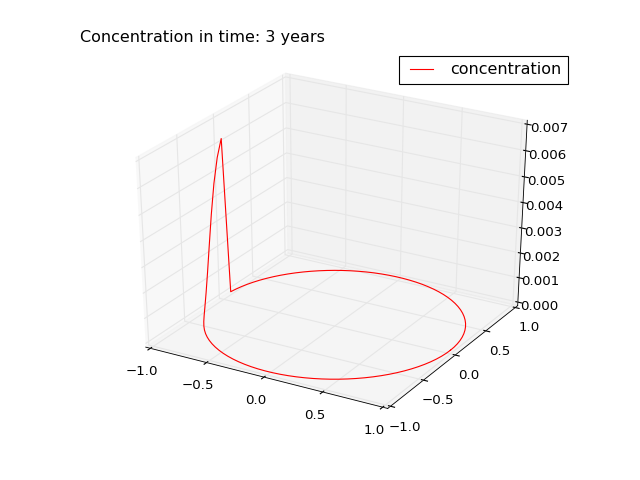

In [3]:
# Extrapolation scheme and the plots

# Initialization of plot

fig = plt.figure()
ax = fig.gca(projection='3d')
lines = ax.plot(xc,yc,c, 'r-', label = 'concentration')
plt.legend(loc='best')
plt.ion()
plt.show()
title = "Concentration in"

# Begin extrapolation and update the plot
# Circular shifting is done by using numpy function roll in the codes below

for i in range(1,nt):
    if fd_type == "centered":
        
        dc = k * (np.roll(c,1) - 2 * c + np.roll(c,-1)) / (dx ** 2) + v * (np.roll(c,1) - 
                                                                 np.roll(c,-1)) / (2 * dx) + p - r * c

    if fd_type == "backward":
        
        dc = k * (np.roll(c,1) - 2 * c + np.roll(c,-1)) / (dx ** 2) + v * (np.roll(c,0) - 
                                                                 np.roll(c,-1)) / dx + p - r * c
            
    if fd_type == "forward":
       
        dc = k * (np.roll(c,1) - 2 * c + np.roll(c,-1)) / (dx ** 2) + v * (np.roll(c,1) - 
                                                                 np.roll(c,0)) / dx + p - r * c
        
        
    # Time extrapolation scheme (Euler)
    cnew = c + dt * dc
    
    # The new presence is the current future!
    c = cnew
    
    c[0]=c[nx-1]                                      # Spatial boundary condition

    # Updating the plots
    if i % isnap == 0:
        for l in lines:
            l.remove()
            del l
        lines = ax.plot(xc,yc,c, 'r-')
        plt.title(title + " time: %.2g years" % (i * dt), loc = 'left')
    plt.gcf().canvas.draw()
    
plt.ioff()
plt.show() 
